In [8]:
import os, sys
os.chdir(sys.path[0])
sys.path.append("..")

%matplotlib inline
import matplotlib.pyplot as plt
from src.ssa.ssa import *
from data.load import *
from data.download import download
import numpy as np

In [9]:
download("https://covid19.who.int/WHO-COVID-19-global-data.csv", "data/WHO-COVID-19-global-data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/WHO-COVID-19-global-data.csv'

In [21]:
path = "data/WHO-COVID-19-global-data.csv"
country = "China"
L = 120
stride = 1
tao = 1
# data_dict = read_data(path, country)
# # x = np.log(data_dict["New_cases"]+1)
# x = data_dict["New_cases"]
# label = x[-15:]
# train_x = x[0:-15]
# print("The data is from %s to %s." % (data_dict['Date'][0], data_dict['Date'][-1]))

num = 1000
t = np.linspace(3.0, 4.0, num=1000)
x = 0.4 * np.ones((num, ))
for i in range(1, num):
    x[i] = t[i] * x[i-1] * (1-x[i-1])
label = x[-15:]
train_x = x[0:-15]

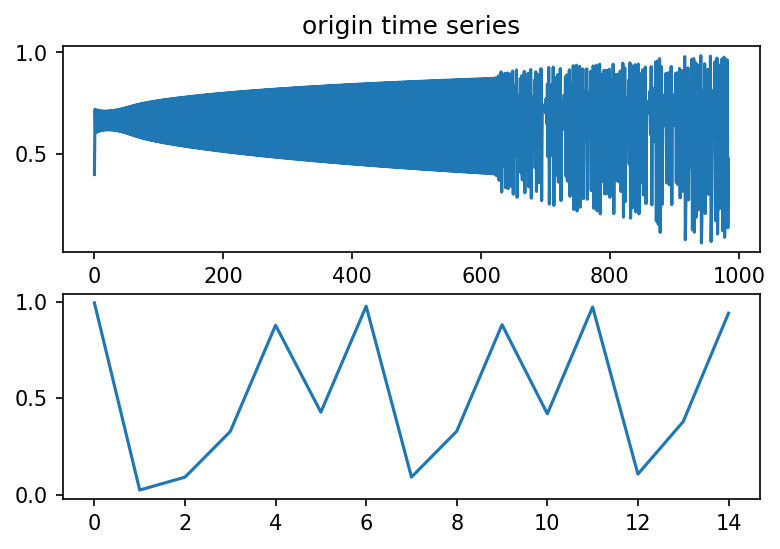

In [22]:
#! 绘制时间序列
plt.figure(dpi=150)
plt.subplot(211)
plt.plot(train_x)
plt.title('origin time series')
plt.subplot(212)
plt.plot(label)
plt.show()

In [23]:
model = SSA(L, 1, 1)
model.embedding(train_x)
model.decomposition_safe()
model.reconstruction()

 相空间维度： 120
 相空间轨迹点个数： 866
 轨迹矩阵的秩： 120


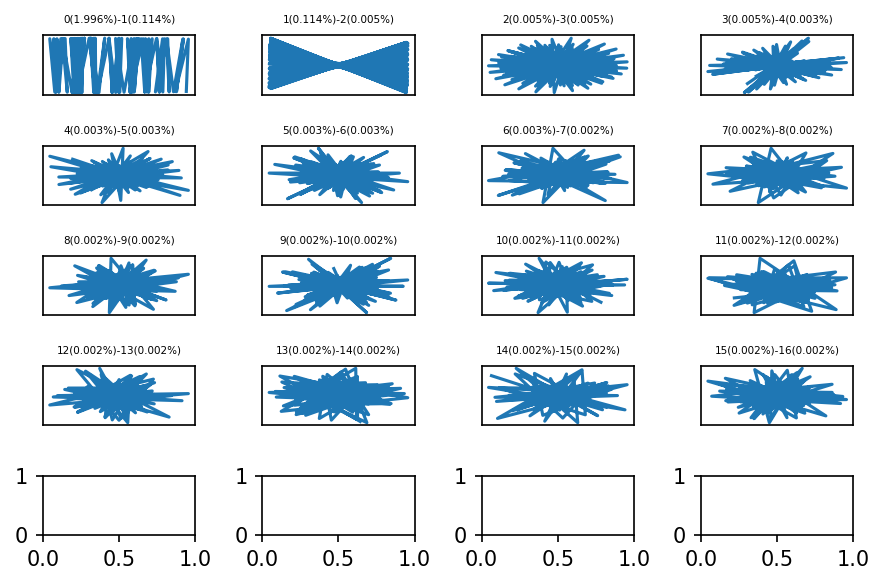

In [24]:
#! 绘制两个特征向量
plot_scatter_eigenvector(model, [i for i in range(0,18)])

[[17, 18, 33, 34, 49, 50, 51, 52, 53, 54], [7, 8, 10, 11, 12, 13, 14], [84, 92, 93, 98, 99, 100, 101, 102, 103, 104, 105, 108], [106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], [1, 2, 3, 4, 5, 6, 9, 19], [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], [20, 21, 22, 23, 24, 25, 26], [15, 16, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41], [42, 43, 44, 45, 46, 47, 48, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], [0, 83, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97]]


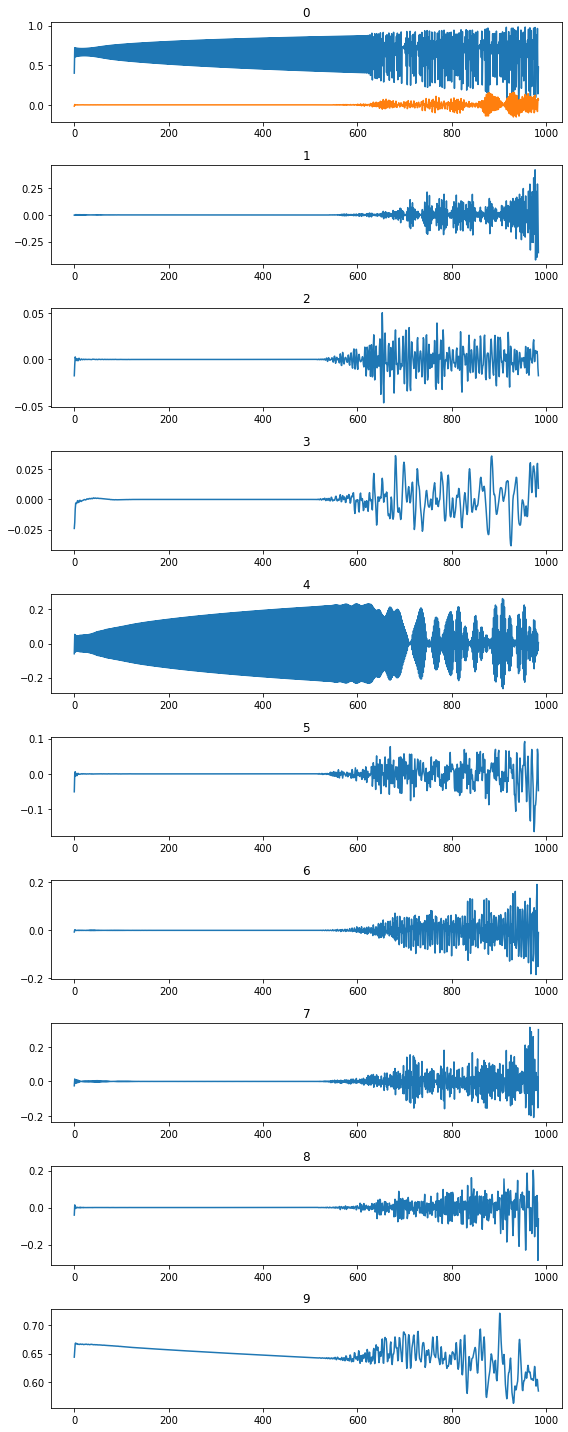

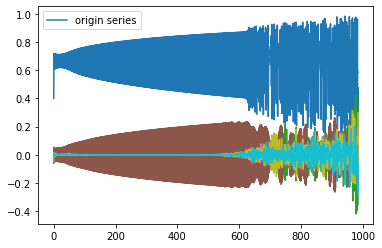

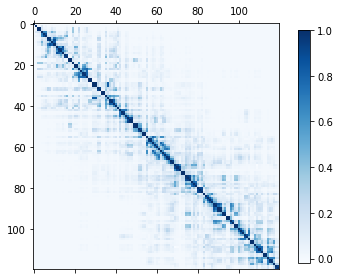

In [25]:
model.grouping(option='SC', params={"n_clusters": 10})
print(model.groups_strategy)
plot_series_array(train_x, model.components_series_grouped)
plot_wmatrix(model.w_matrix)

[0]


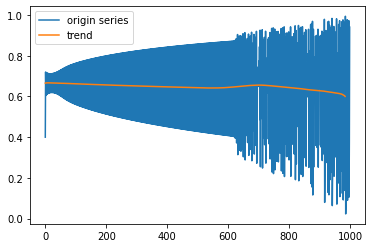

In [26]:
#! 趋势提取结果展示
trend_index, trend = model.extract_trend(omega=0.01, thres=0.9)
print(trend_index)
plt.figure()
plt.plot(x)
plt.plot(trend)
plt.legend(['origin series', 'trend'])
plt.show()

[2, 27, 112]


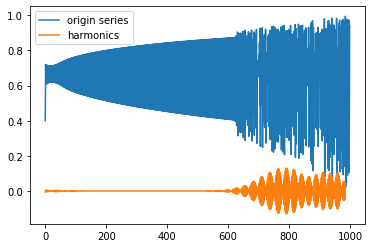

In [28]:
harmonic_index, harmonics = model.extract_harmonics(thres=0.7)
print(harmonic_index)
plt.figure()
plt.plot(x)
plt.plot(harmonics[0])
plt.legend(['origin series', 'harmonics'])
plt.show()

In [29]:
#! 频率估计
omega_estimation = freq_estimation(model.eigenvector_left[:, 3:4], model.eigenvector_left[:, 4:5])
print(omega_estimation)

0.49569804642852255


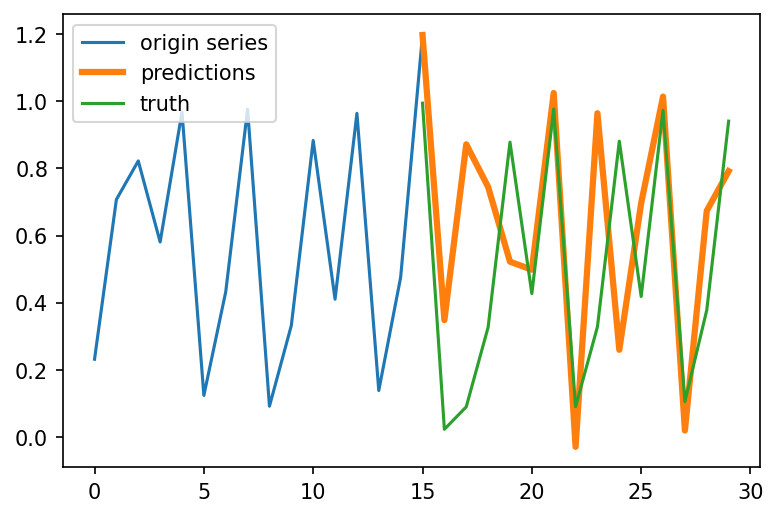

mse:  0.13776444390684545


In [30]:
m = 15
y = model.predict(m, grouped=True, method='r')
y = np.sum(y, axis=0)
plt.figure(dpi=150)
plt.plot(np.concatenate([train_x[model.length-m:], y]))
plt.plot([i for i in range(m, m+m)], y, linewidth=3)
plt.plot([i for i in range(m, m+m)], label)
plt.legend(["origin series", "predictions", "truth"])
plt.show()
print("mse: ", np.mean((y-label)**2))

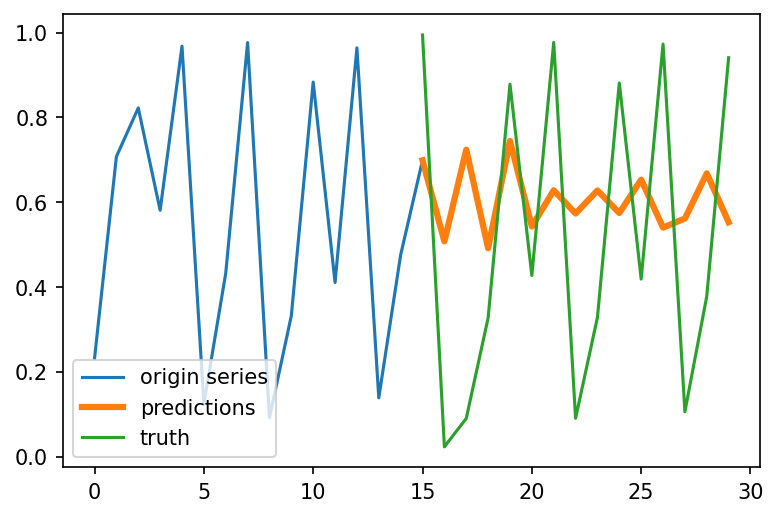

mse:  0.13362343092459156


In [31]:
m = 15
y = model.predict(m, grouped=True, method='v')
y = np.sum(y, axis=0)
plt.figure(dpi=150)
plt.plot(np.concatenate([train_x[model.length-m:], y]))
plt.plot([i for i in range(m, m+m)], y, linewidth=3)
plt.plot([i for i in range(m, m+m)], label)
plt.legend(["origin series", "predictions", "truth"])
plt.show()
print("mse: ", np.mean((y-label)**2))

In [ ]:
L = 180
model = SSA(L, 1, 1)
model.embedding(x)
model.decomposition_safe()
model.reconstruction()

 相空间维度： 180
 相空间轨迹点个数： 690
 轨迹矩阵的秩： 180


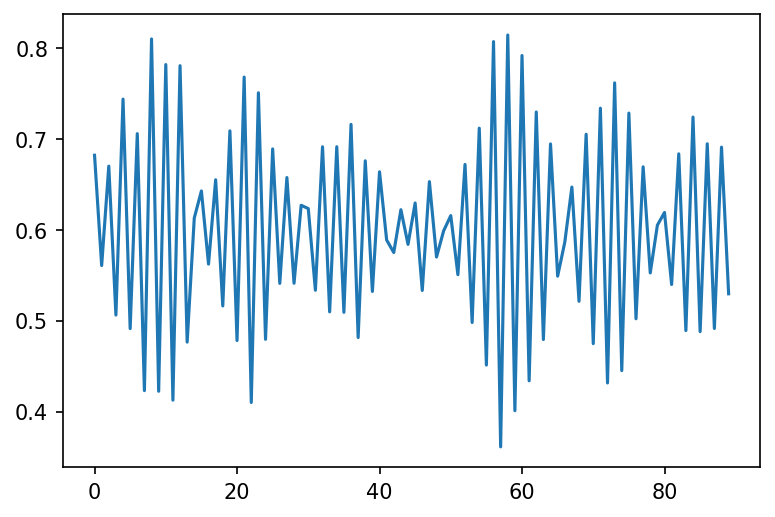

In [32]:
model.grouping(option='SC', params={"n_clusters": 10})
m = 90
y = model.predict(m, grouped=True, method='v')
y = np.sum(y, axis=0)
plt.figure(dpi=150)
plt.plot(y)
plt.show()